In [129]:
import numpy as np
import matplotlib.pyplot as plt
from solvers import Runge_Kutta_Sistema
from scipy.signal import find_peaks, savgol_filter

$$
\frac{dx}{dt} = s(y - x) \\
\frac{dy}{dt} = rx - y - xz \\
\frac{dz}{dt} = xy - bz
$$


In [130]:
def F(X, t, p):
    return np.array([p[0]*(X[1]-X[0]),
                     p[1]*X[0] - X[1] - X[0]*X[2],
                     X[0]*X[1] - p[2]*X[2]],dtype=float)


X0 = [1, 0.5, 0.1]
p = [10,82,8/3]
inter = [0,50]

sols = Runge_Kutta_Sistema(fun=F, 
                           interval=inter, 
                           X0=X0, 
                           h=0.01, 
                           p=p)

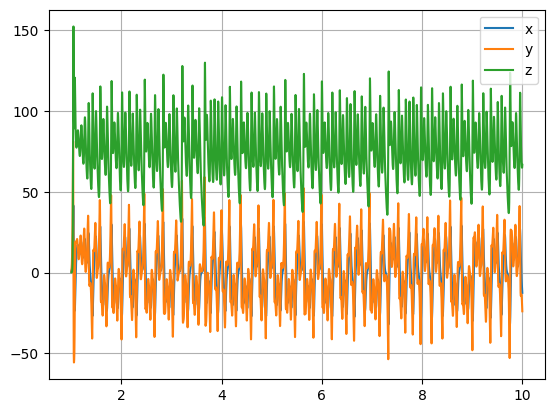

In [131]:
fig, ax = plt.subplots(1,1)
x = np.linspace(1,10,5000)
ax.plot(x, sols[:,0], label='x')
ax.plot(x, sols[:,1], label='y')
ax.plot(x, sols[:,2], label='z')
ax.grid()
ax.legend()
plt.show()

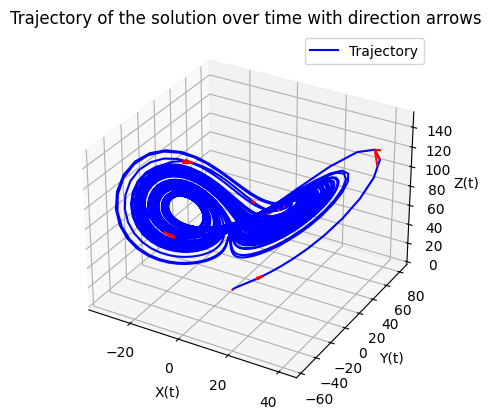

In [132]:
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact
import matplotlib.animation as animation

# Example data - Replace with your actual solutions
t = np.linspace(0, 10, 100)  # Time points
x = sols[:,0]
y = sols[:,1]
z = sols[:,2]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot x(t), y(t), z(t) as a parametric curve
ax.plot(x, y, z, label='Trajectory', color='blue')

# Add arrows to indicate the direction of the solution
# Use an interval to avoid too many arrows, e.g., every 10th point
arrow_interval = 10
for i in range(0, len(t)-arrow_interval, arrow_interval):
    ax.quiver(
        x[i], y[i], z[i],  # Starting point of the arrow
        x[i+1]-x[i], y[i+1]-y[i], z[i+1]-z[i],  # Direction of the arrow
        color='red', arrow_length_ratio=0.9)  # Adjust length ratio for the arrows

# Set labels and title
ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_zlabel('Z(t)')
ax.set_title('Trajectory of the solution over time with direction arrows')

plt.legend()
plt.show()


In [133]:
def F(X, t, p):
    return np.array([p[0]*(X[1]-X[0]),
                     p[1]*X[0] - X[1] - X[0]*X[2],
                     X[0]*X[1] - p[2]*X[2]],dtype=float)


X0 = [1, 0.5, 0.1]
p = [10,28,8/3]
inter = [0,300]

sols = Runge_Kutta_Sistema(fun=F, 
                           interval=inter, 
                           X0=X0, 
                           h=0.1, 
                           p=p)

t_values = np.linspace(0,300,3000)

trans = 500

t_trans = t_values[trans:]
x = sols[trans:,0]
y = sols[trans:,1]
z = sols[trans:,2]

In [134]:
t_peaks = np.array([t_trans[i] for i in range(1, len(z) - 1) if z[i] > z[i-1] and z[i] > z[i+1]])
z_peaks = np.array([z[i] for i in range(1, len(z) - 1) if z[i] > z[i-1] and z[i] > z[i+1]])

In [135]:
# # Encontrar máximos locales en z(t)
# peaks, _ = find_peaks(z)
# z_peaks = z[peaks]
# t_peaks = t_values[peaks]

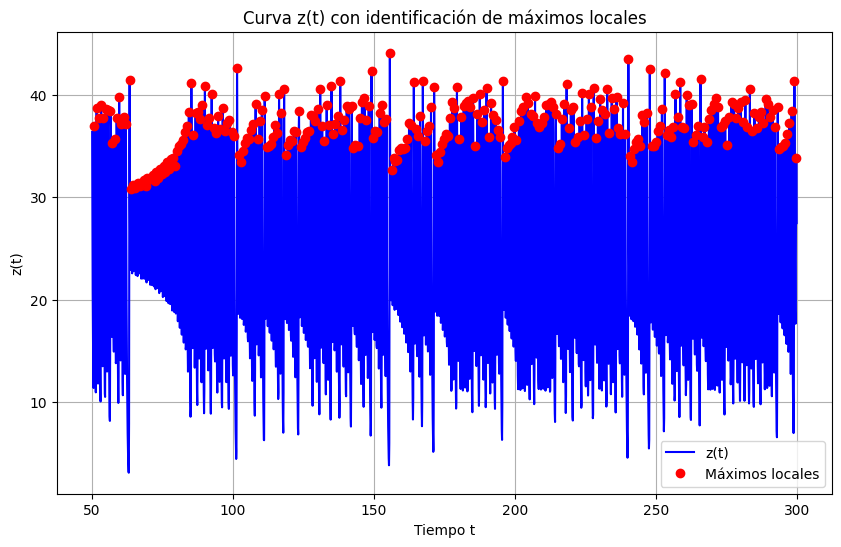

In [136]:
# Graficar z(t) e identificar los máximos
plt.figure(figsize=(10, 6))
plt.plot(t_trans, z, label='z(t)', color='b')
plt.plot(t_peaks, z_peaks, "ro", label='Máximos locales')  # Máximos locales marcados en rojo
plt.title('Curva z(t) con identificación de máximos locales')
plt.xlabel('Tiempo t')
plt.ylabel('z(t)')
plt.grid(True)
plt.legend()
plt.show()

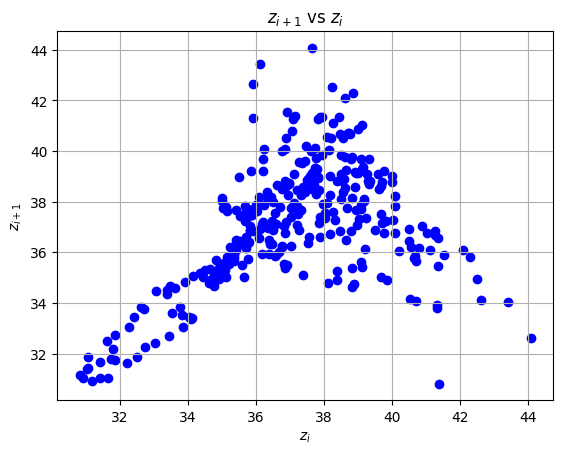

In [137]:
# Graficar z_{i+1} vs z_i
plt.figure()
plt.scatter(z_peaks[:-1], z_peaks[1:], color='b')
plt.title(r'$z_{i+1}$ vs $z_i$')
plt.xlabel(r'$z_i$')
plt.ylabel(r'$z_{i+1}$')
plt.grid(True)
plt.show()


In [138]:
# 1) Añadir ruido gaussiano de varianza 1 a la curva z(t)
np.random.seed(42)  # Para reproducibilidad
noise = np.random.normal(0, 1, size=z.shape)
z_tilde = z + noise

# 2) Suavizar la curva usando savgol_filter
window_length = 101  # Debe ser impar
polyorder = 3  # Orden del polinomio
z_smooth = savgol_filter(z_tilde, window_length, polyorder)

# 3) Identificar los máximos locales de la curva suavizada
peaks_smooth, _ = find_peaks(z_smooth)
z_smooth_peaks = z_smooth[peaks_smooth]
t_smooth_peaks = t_values[peaks_smooth]

# Encontrar los máximos locales de la curva con ruido (sin suavizar)
peaks_noise, _ = find_peaks(z_tilde)
z_noise_peaks = z_tilde[peaks_noise]
t_noise_peaks = t_values[peaks_noise]

ValueError: x and y must have same first dimension, but have shapes (3000,) and (2500,)

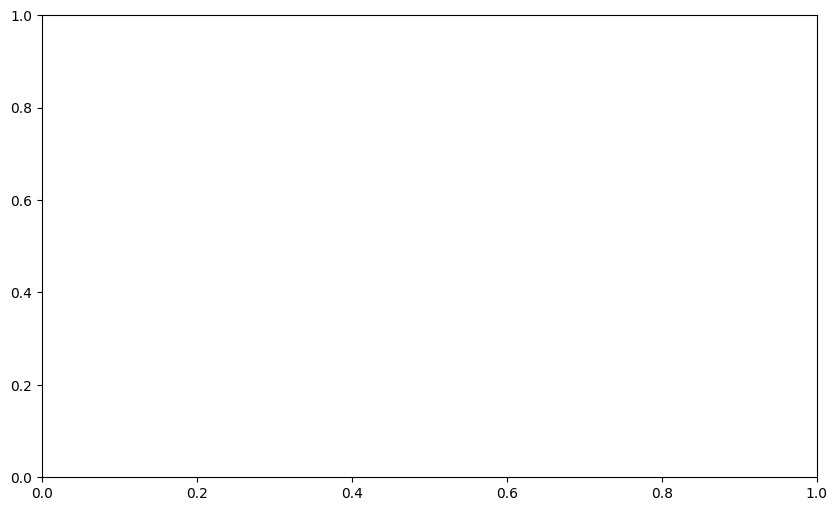

In [139]:
# 4) Graficar la curva suavizada z̃(t) vs t
plt.figure(figsize=(10, 6))
plt.plot(t_values, z_smooth, label='z̃(t) Suavizada', color='b')
plt.plot(t_smooth_peaks, z_smooth_peaks, 'bo', label='Máximos de z̃(t) Suavizada')
plt.plot(t_noise_peaks, z_noise_peaks, 'ro', label='Máximos de z̃(t) con Ruido')
plt.title('Curva z̃(t) Suavizada con Identificación de Máximos')
plt.xlabel('Tiempo t')
plt.ylabel('z̃(t)')
plt.grid(True)
plt.legend()
plt.show()

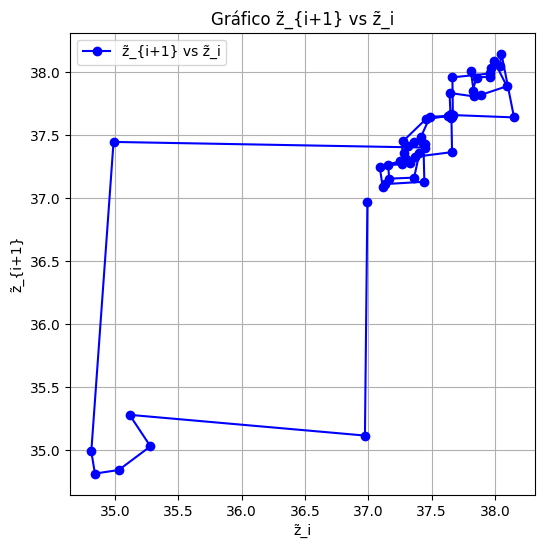

In [54]:
# 5) Graficar z̃_{i+1} vs z̃_i
plt.figure(figsize=(6, 6))
plt.plot(z_smooth_peaks[:-1], z_smooth_peaks[1:], 'bo-', label="z̃_{i+1} vs z̃_i")
plt.title('Gráfico z̃_{i+1} vs z̃_i')
plt.xlabel('z̃_i')
plt.ylabel('z̃_{i+1}')
plt.grid(True)
plt.legend()
plt.show()

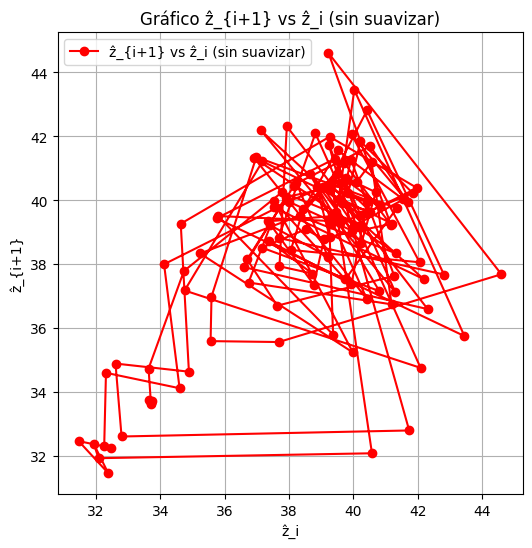

In [55]:
# 6) Graficar ẑ_{i+1} vs ẑ_i (sin suavizar)
plt.figure(figsize=(6, 6))
plt.plot(z_noise_peaks[:-1], z_noise_peaks[1:], 'ro-', label="ẑ_{i+1} vs ẑ_i (sin suavizar)")
plt.title('Gráfico ẑ_{i+1} vs ẑ_i (sin suavizar)')
plt.xlabel('ẑ_i')
plt.ylabel('ẑ_{i+1}')
plt.grid(True)
plt.legend()
plt.show()